## Market metrics analysis

- Let's evaluate some of the key market metrics of Basic Attention Token (BAT) versus its more established counterparts, such as Bitcoin (BTC) and Ethereum (ETH). But first, let's look at what is available in terms of market and profile metrics for BAT:

In [2]:
import json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

#parson json file
with open('assets_data.json') as f:
    assets_data = json.load(f)

In [3]:
#load assets data into a pandas dataframe
assets = pd.DataFrame(assets_data)
assets

,ticker,metrics,profile,time_series
0,BTC,"{'id': '1e31218a-e44e-4285-820c-8282ee222035',...","{'id': '1e31218a-e44e-4285-820c-8282ee222035',...","{'id': '1e31218a-e44e-4285-820c-8282ee222035',..."
1,ETH,"{'id': '21c795f5-1bfd-40c3-858e-e9d7e820c6d0',...","{'id': '21c795f5-1bfd-40c3-858e-e9d7e820c6d0',...","{'id': '21c795f5-1bfd-40c3-858e-e9d7e820c6d0',..."
2,BAT,"{'id': '4db01dd4-686b-4bdc-a143-06b616101b39',...","{'id': '4db01dd4-686b-4bdc-a143-06b616101b39',...","{'id': '4db01dd4-686b-4bdc-a143-06b616101b39',..."


- We see that the metrics and profile dictionaries for each ticker is stored in an individual field. Let's take a look at the columns for metrics and profile dicts for BAT:

In [4]:
bat_metrics_dict = assets['metrics'].iloc[2].copy()
bat_profile_dict = assets['profile'].iloc[2].copy()

In [5]:
print(f'Available metrics: {list(bat_metrics_dict.keys())}', sep='\n')
print()
print(f'Available profile details: {list(bat_profile_dict.keys())}', sep='\n')

Available metrics: ['id', 'symbol', 'name', 'slug', '_internal_temp_agora_id', 'market_data', 'marketcap', 'supply', 'blockchain_stats_24_hours', 'market_data_liquidity', 'all_time_high', 'cycle_low', 'token_sale_stats', 'staking_stats', 'mining_stats', 'developer_activity', 'roi_data', 'roi_by_year', 'risk_metrics', 'misc_data', 'lend_rates', 'borrow_rates', 'loan_data', 'reddit', 'on_chain_data', 'exchange_flows', 'alert_messages']

Available profile details: ['id', 'symbol', 'name', 'slug', '_internal_temp_agora_id', 'is_verified', 'tagline', 'overview', 'background', 'technology', 'category', 'sector', 'tag', 'sfarScore', 'token_distribution', 'token_details', 'organizations', 'people', 'relevant_resources', 'consensus_algorithm']


- We see that the data available in the metrics dictionary are most relevant to our analytical objectives. We should come up with a few research questions to decide which metrics should be used. Similar to other real world commodities in exchange, some of the metrics must be concerned with supply and demand for the cryptocurrency of interest. For cryptocurrency, these are mainly:

    1) Reported market cap
    2) Initial supply
    3) Supply at FY2050
    4) Real Volume

- Additionally, we would like to look at some of the investment metric, namely:

    5) All Time High
    6) Cycle Low
    7) ROI by Year
    8) Excess return per unit risk (Sharpe Ratio)


In [36]:
btc_metrics_dict = assets['metrics'].iloc[0].copy()
eth_metrics_dict = assets['metrics'].iloc[1].copy()
marketcap = pd.DataFrame()
marketcap = pd.concat([marketcap, pd.Series(btc_metrics_dict['marketcap'].copy()), pd.Series(eth_metrics_dict['marketcap'].copy()), pd.Series(bat_metrics_dict['marketcap'].copy())], axis=1)
marketcap.columns = list(assets['ticker'])
marketcap

,BTC,ETH,BAT
marketcap_dominance_percent,6.138881e+01,1.179752e+01,6.635277e-02
current_marketcap_usd,1.116226e+12,2.145131e+11,1.206485e+09
y_2050_marketcap_usd,1.255830e+12,2.543571e+11,1.213888e+09
y_plus10_marketcap_usd,1.232608e+12,2.297582e+11,1.213888e+09
liquid_marketcap_usd,1.116268e+12,2.153087e+11,1.213888e+09
realized_marketcap_usd,2.995049e+11,1.064263e+11,6.788413e+08
volume_turnover_last_24_hours_percent,1.120355e+00,2.538087e+00,8.151074e+00


In [37]:
marketcap.reset_index(inplace=True)
marketcap.rename(columns={'index':'metrics'}, inplace=True)
marketcap

,metrics,BTC,ETH,BAT
0,marketcap_dominance_percent,6.138881e+01,1.179752e+01,6.635277e-02
1,current_marketcap_usd,1.116226e+12,2.145131e+11,1.206485e+09
2,y_2050_marketcap_usd,1.255830e+12,2.543571e+11,1.213888e+09
3,y_plus10_marketcap_usd,1.232608e+12,2.297582e+11,1.213888e+09
4,liquid_marketcap_usd,1.116268e+12,2.153087e+11,1.213888e+09
5,realized_marketcap_usd,2.995049e+11,1.064263e+11,6.788413e+08
6,volume_turnover_last_24_hours_percent,1.120355e+00,2.538087e+00,8.151074e+00


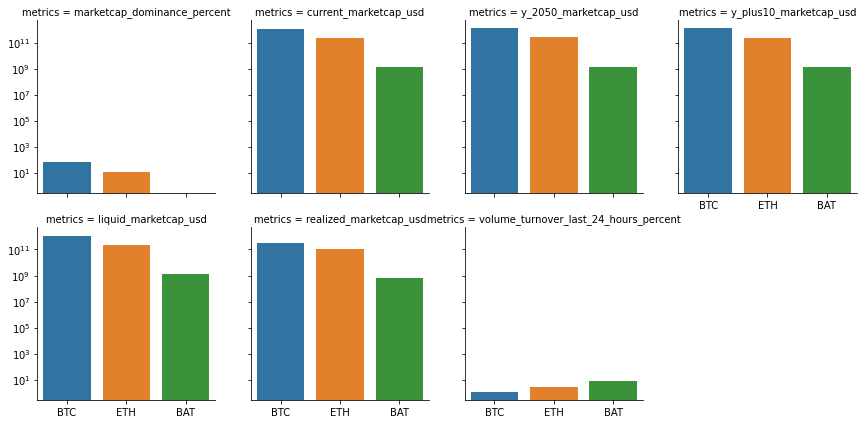

In [49]:
g = sns.catplot(col='metrics', col_wrap=4, data=marketcap, kind='bar', height=3)
g.set(yscale='log')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()

In [50]:
supply = pd.DataFrame()
supply = pd.concat([supply, pd.Series(btc_metrics_dict['supply'].copy()), pd.Series(eth_metrics_dict['supply'].copy()), pd.Series(bat_metrics_dict['supply'].copy())], axis=1)
supply.columns = list(assets['ticker'])
supply

,BTC,ETH,BAT
y_2050,2.098634e+07,1.351356e+08,1.500000e+09
y_plus10,2.059828e+07,1.220666e+08,1.500000e+09
liquid,1.865411e+07,1.143899e+08,1.500000e+09
circulating,1.865340e+07,1.139672e+08,1.490853e+09
y_2050_issued_percent,8.888692e+01,8.464820e+01,1.000000e+02
annual_inflation_percent,1.802038e+00,1.643942e+00,0.000000e+00
stock_to_flow,5.549271e+01,6.082940e+01,NaN
y_plus10_issued_percent,9.056150e+01,9.371101e+01,1.000000e+02


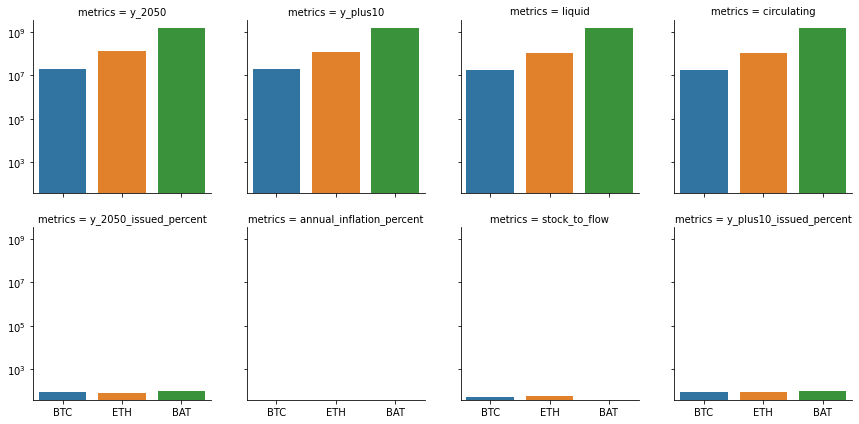

In [51]:
supply.reset_index(inplace=True)
supply.rename(columns={'index':'metrics'}, inplace=True)
g2 = sns.catplot(col='metrics', col_wrap=4, data=supply, kind='bar', height=3)
g2.set(yscale='log')
plt.subplots_adjust(hspace=0.2, wspace=0.2)
plt.show()